/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[('cpu', 0.798215925693512), ('cache', 0.789932906627655), ('timing', 0.7648860812187195), ('maximum', 0.7600128650665283), ('setup', 0.7591561079025269), ('ram', 0.74891197681427), ('colour', 0.7483044862747192), ('configuration', 0.7474259734153748), ('processor', 0.742374837398529), ('vram', 0.7388341426849365)]


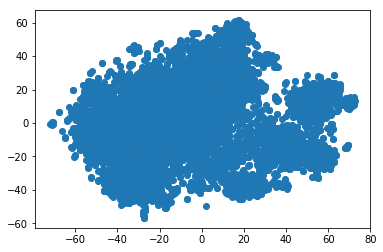

In [6]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
%matplotlib inline

# download example data ( may take a while)
train = fetch_20newsgroups()

def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

sentences = [line for text in train.data for line in clean(text)]

model = Word2Vec(sentences, workers=4, size=100, min_count=50, window=10, sample=1e-3)
word2vec_model = model
print (model.most_similar('memory'))

X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [7]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
model.fit_transform(X) 

array([[-176.53618 , -352.45975 ],
       [  38.258865, -238.08774 ],
       [ -11.942893, -402.68906 ],
       [-126.334366, -187.85811 ]], dtype=float32)

In [9]:

vocab = sorted(word2vec_model.get_vocab()) #not sure the exact api
emb_tuple = tuple([word2vec_model[v] for v in vocab])
X = numpy.vstack(emb_tuple)

AttributeError: 'Word2Vec' object has no attribute 'get_vocab'